# Warming Up Exercises - Basic Inspection and Exploration:

**Problem 1 - Data Read, Write and Inspect:
Complete all following Task:**

• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.

In [1]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Concepts of AI Colab/W2 Datasets/bank .csv')
df = pd.DataFrame(dataset)

print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

2. Check info of the DataFrame and identify following:

(a) columns with dtypes=object

(b) unique values of those columns.

(c) check for the total number of null values in each column.

In [2]:
df.info()

# (a) Columns with dtypes=object
object_columns = df.select_dtypes(include=['object']).columns

# (b) Unique values of those columns
for col in object_columns:
    print(f"Unique values in {col}:", df[col].unique())

# (c) Total number of null values in each column
print("\nNumber of null values in each column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Unique values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 

3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in ”.csv” with name ”banknumericdata.csv”

In [3]:
df_numeric = df.select_dtypes(exclude='object')
df_numeric.to_csv("banknumericdata.csv", index=False)

4. Read ”banknumericdata.csv” and Find the summary statistics.

In [4]:
df_numeric_summary = pd.read_csv("banknumericdata.csv")
print(df_numeric_summary.head(), "\n")
print(df_numeric_summary.describe())

   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0 

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       

**Problem 2 - Data Imputations:**

Complete all the following Task:

• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.

In [5]:
df_medical = pd.read_csv("/content/drive/MyDrive/Concepts of AI Colab/W2 Datasets/medical_students_dataset.csv")
df_medical.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


2. Check info of the DataFrame and identify column with missing (null) values.

In [6]:
print(df_medical.info())
print("\nNumber of missing values in each column:")
print(df_medical.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Number of missing values in each column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Wei

3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

In [7]:
for col in df_medical.columns:
  if df_medical[col].isnull().sum() > 0:
    if df_medical[col].dtype == 'object':
      #Filled categorical column with mode
      df_medical[col] = df_medical[col].fillna(df_medical[col].mode()[0])
    else:
      #Filled numeric columns with mean
      df_medical[col] = df_medical[col].fillna(df_medical[col].mean())

print("\nMissing values after filling:")
print(df_medical.isnull().sum())


Missing values after filling:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [8]:
print("\nNumber of duplicate rows:", df_medical.duplicated().sum())
df_medical = df_medical.drop_duplicates()
print("Number of rows after removing duplicates:", len(df_medical))


Number of duplicate rows: 12572
Number of rows after removing duplicates: 187428


# Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

**Dataset Used: "titanic.csv"**

**Problem - 1:**

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [9]:
titanic_df = pd.read_csv("/content/drive/MyDrive/Concepts of AI Colab/W2 Datasets/Titanic-Dataset.csv")

subset_df = titanic_df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class_df = subset_df[subset_df['Pclass'] == 1]

mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

print("Fare Stats for First-Class Passesngers")
print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Maximum Fare:", max_fare)
print("Minimum Fare:", min_fare)

Fare Stats for First-Class Passesngers
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


**Problem - 2:**

How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [12]:
# Null values in 'Age' column
null_age_count = first_class_df['Age'].isnull().sum()
print(f"Number of null values in 'Age': {null_age_count}")

# Drop rows with null 'Age'
cleaned_df = first_class_df.dropna(subset=['Age'])
print(f"Number of rows after dropping null values: {len(cleaned_df)}")

Number of null values in 'Age': 30
Number of rows after dropping null values: 186


**Problem - 3:**

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:

• ’C’ for Cherbourg

• ’Q’ for Queenstown

• ’S’ for Southampton

Task:

1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [10]:
# One-hot encoding for 'Embarked'
embarked_encoded = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')

# Add encoded columns to the DataFrame
titanic_df = pd.concat([titanic_df, embarked_encoded], axis=1)

# Drop original 'Embarked' column
titanic_df = titanic_df.drop(columns=['Embarked'])

# Print first few rows to verify
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


**Problem - 4:**

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


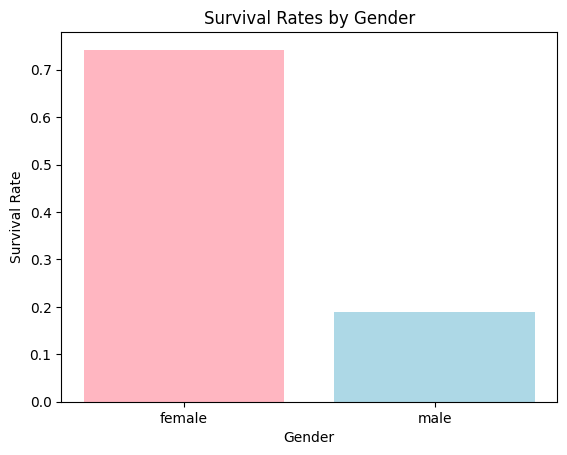

In [14]:
import matplotlib.pyplot as plt

# Mean survival rates by gender
survival_rates_gender = titanic_df.groupby('Sex')['Survived'].mean()
print("Survival Rates by Gender:")
print(survival_rates_gender)

# Visualization
plt.bar(survival_rates_gender.index, survival_rates_gender.values, color=['lightpink', 'lightblue'])
plt.title("Survival Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

**Problem - 5:**

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

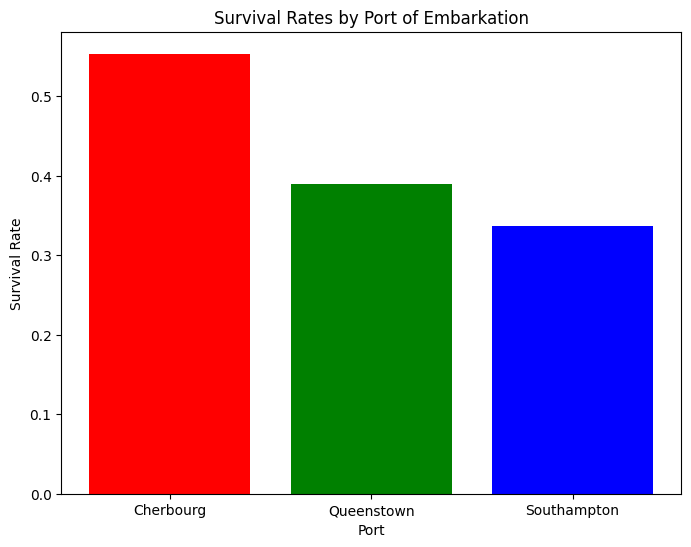

In [16]:
# Calculate mean survival rates for each port using one-hot encoded columns
survival_rates_port = {
    'Cherbourg': titanic_df.loc[titanic_df['Embarked_C'] == 1, 'Survived'].mean(),
    'Queenstown': titanic_df.loc[titanic_df['Embarked_Q'] == 1, 'Survived'].mean(),
    'Southampton': titanic_df.loc[titanic_df['Embarked_S'] == 1, 'Survived'].mean(),
}

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(survival_rates_port.keys(), survival_rates_port.values(), color=['red', 'green', 'blue'])
plt.title("Survival Rates by Port of Embarkation")
plt.xlabel("Port")
plt.ylabel("Survival Rate")
plt.show()